In [ ]:
# https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd

In [4]:
data = pd.read_csv("HistoricalPrices.csv")
data.head()

,Date,Open,High,Low,Close
0,12/17/25,48128.05,48387.33,47856.79,47885.97
1,12/16/25,48380.17,48452.17,47946.25,48114.26
2,12/15/25,48594.36,48679.14,48283.27,48416.56
3,12/12/25,48714.75,48886.86,48334.10,48458.05
4,12/11/25,48082.90,48756.34,48082.90,48704.01


In [5]:
data.columns.tolist()

['Date', ' Open', ' High', ' Low', ' Close']

In [6]:
data = data.rename(columns = {' Open':'Open', ' High':'High', ' Low':'Low', ' Close':'Close'})

In [7]:
data.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close']

In [8]:
# check datatype
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [10]:
# convert date 
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/f3/3kqpjfqj03s00nxsf6rppv280000gn/T/ipykernel_45913/2851538050.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [11]:
# check datatype
data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [13]:
# sort data by date 
data = data.sort_values(by='Date')
data

,Date,Open,High,Low,Close
324,2024-09-03,41489.67,41489.67,40778.09,40936.93
323,2024-09-04,40872.06,41172.59,40840.89,40974.97
322,2024-09-05,41056.33,41084.78,40519.08,40755.75
321,2024-09-06,40756.81,41009.39,40297.33,40345.41
320,2024-09-09,40555.11,41000.24,40518.06,40829.59
...,...,...,...,...,...
4,2025-12-11,48082.90,48756.34,48082.90,48704.01
3,2025-12-12,48714.75,48886.86,48334.10,48458.05
2,2025-12-15,48594.36,48679.14,48283.27,48416.56
1,2025-12-16,48380.17,48452.17,47946.25,48114.26


In [14]:
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

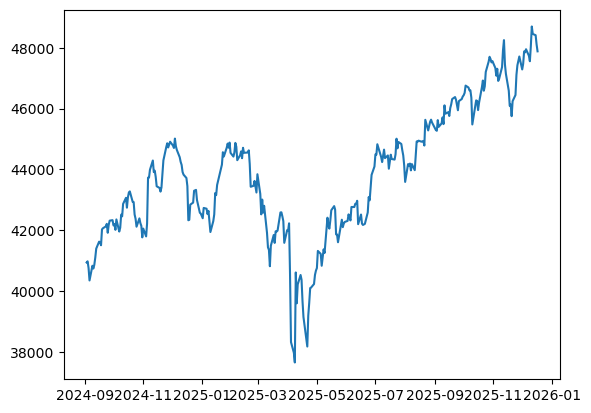

In [15]:
# drawing Line plot
plt.plot(data['Date'],data['Close'])
plt.show()

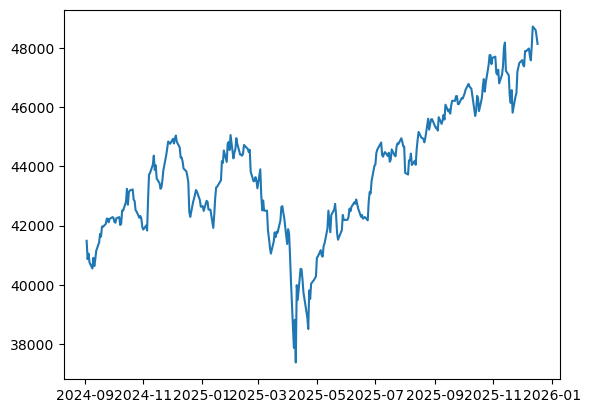

In [16]:
plt.plot(data['Date'],data['Open'])
plt.show()

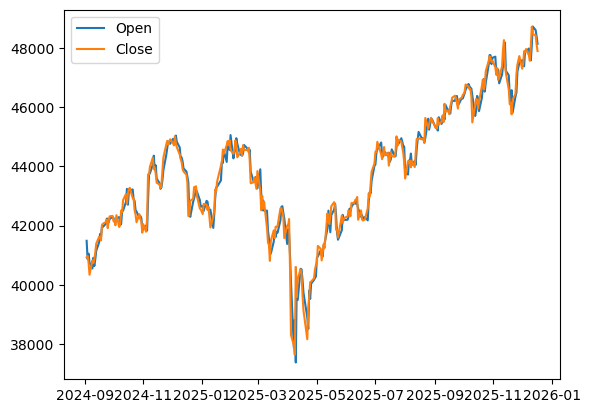

In [19]:
plt.plot(data['Date'],data['Open'],label="Open")
plt.plot(data['Date'],data['Close'],label="Close")
plt.legend()
plt.show()

In [26]:
# bar plot
from calendar import month_name

# oder by month
data["Month"] = pd.Categorical(data['Date'].dt.month_name(),month_name[1:])
# group by month averages
monthly = data.groupby('Month').mean().reset_index()
monthly.head(13)

/var/folders/f3/3kqpjfqj03s00nxsf6rppv280000gn/T/ipykernel_45913/3178801553.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = data.groupby('Month').mean().reset_index()


,Month,Date,Open,High,Low,Close
0,January,2025-01-17 07:12:00.000000000,43469.347000,43708.303500,43271.623500,43524.349000
1,February,2025-02-15 10:06:18.947368448,44219.671579,44422.124211,43956.792105,44209.310000
2,March,2025-03-16 05:42:51.428571392,42143.297619,42403.295238,41760.600476,42092.129048
3,April,2025-04-15 04:34:17.142857216,39847.356667,40381.478571,39248.301429,39876.327619
4,May,2025-05-15 13:42:51.428571392,41806.267143,42059.313333,41615.895238,41864.245714
5,June,2025-06-15 01:12:00.000000000,42691.732500,42910.207000,42536.618000,42752.938000
6,July,2025-07-16 13:05:27.272727296,44513.047727,44669.144091,44306.550909,44499.740909
7,August,2025-08-15 18:17:08.571428608,44726.930000,44907.867619,44552.331429,44764.850952
8,September,2025-03-21 16:58:32.195121920,43745.063659,43929.845122,43530.305610,43753.361220
9,October,2025-04-16 16:10:26.086956544,44606.144565,44819.555652,44390.878043,44601.934783


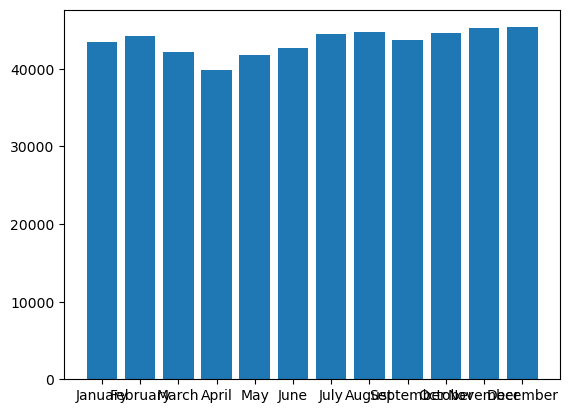

In [27]:
# vertical bar plots
plt.bar(monthly['Month'],height=monthly['Open'])
plt.show()

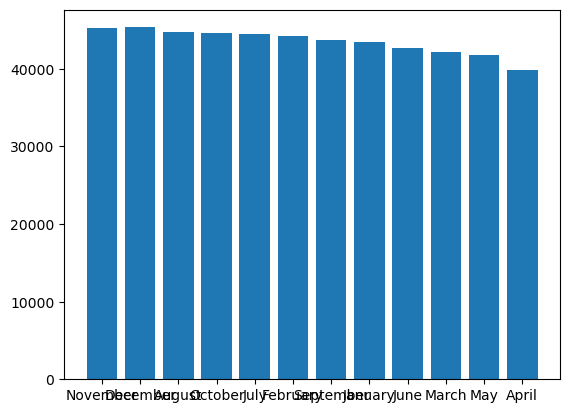

In [30]:
monthly_srtd = monthly.sort_values(by='Close',ascending=False)
plt.bar(monthly_srtd['Month'],height=monthly_srtd['Open'])
plt.show()

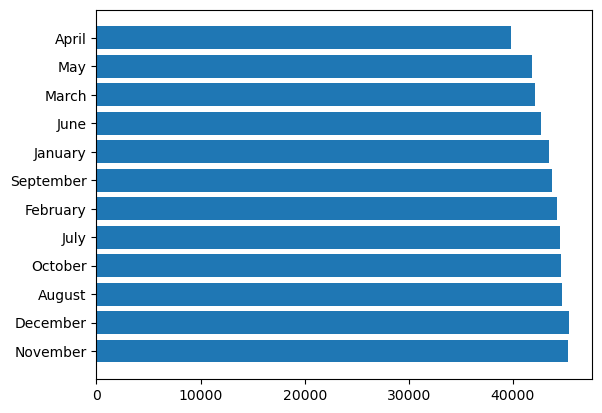

In [31]:
plt.barh(monthly_srtd['Month'],width=monthly_srtd['Open'])
plt.show()

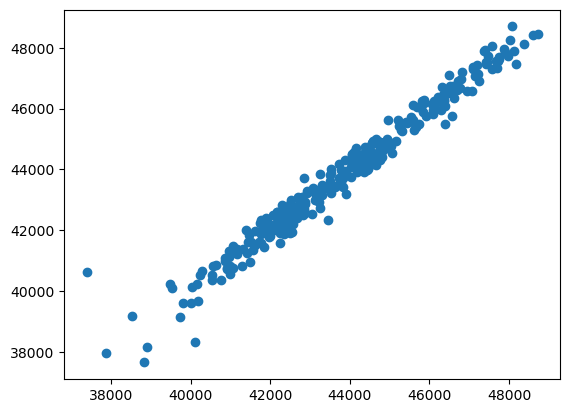

In [32]:
# scatter plots
plt.scatter(data['Open'],data['Close'])
plt.show()

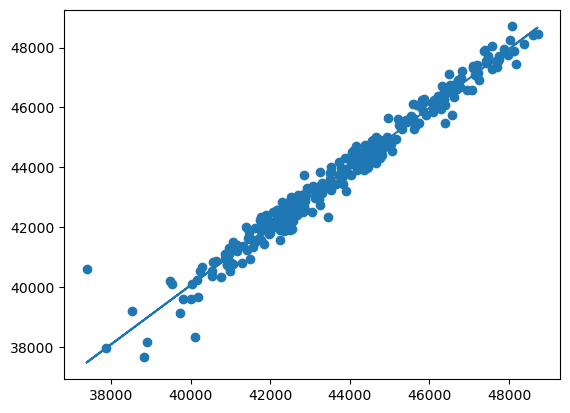

In [37]:
z = np.polyfit(data['Open'],data['Close'],1)
p = np.poly1d(z)
plt.scatter(data['Open'],data['Close'])
plt.plot(data['Open'],p(data['Open']))
plt.show()

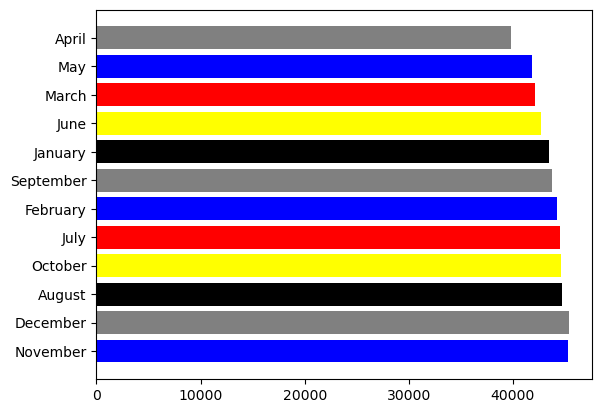

In [38]:
plt.barh(monthly_srtd['Month'],width=monthly_srtd['Open'],color=['blue','gray','black','yellow','red'])
plt.show()

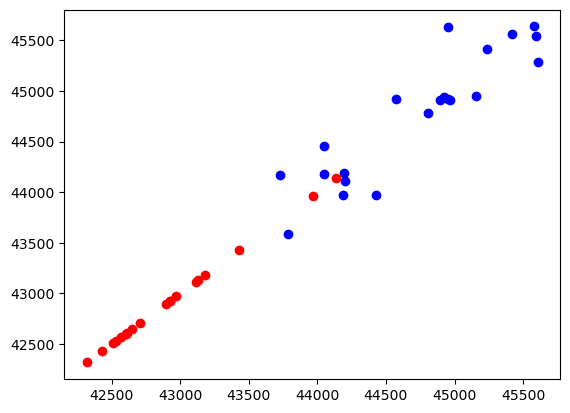

In [40]:
# scatter plots
plt.scatter(data[data['Month'] == 'August']['Open'],data[data['Month'] == 'August']['Close'],color='blue')
plt.scatter(data[data['Month'] == 'June']['High'],data[data['Month'] == 'June']['High'],color='red')

plt.show()

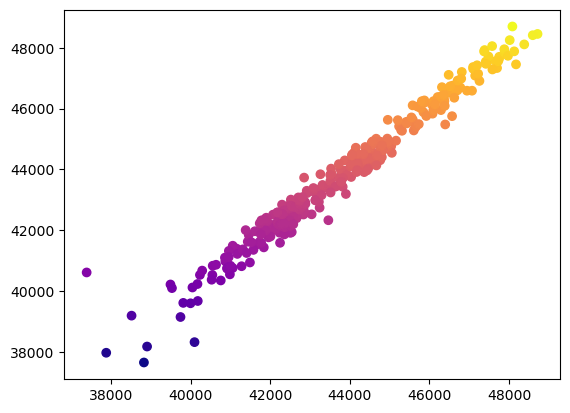

In [43]:
# scatter plots
plt.scatter(data['Open'],data['Close'],c=data['Close'],cmap=plt.cm.plasma)

plt.savefig('open.png')
plt.show()